## Explanatory Data Visualization

#### Overview of the Dataset
It is based on data from Prosper, which is the first marketplace lending platform in America, with more than $7 billion in financed loans. There are 113,937 loans in this set with 81 variables per loan, including the amount of the loan, the borrower's rate (or interest rate), the current status of the loan, the borrower's income, employment status, and credit history.

#### BorrowerAPR(Annual Percentage Rate)
Borrower Annual Percentage Rate(APR) distribution shows multimodal distribution. There's a small peak at 0.1, another peak at 0.21, with another peak at 0.3. In addition, there is one exceptionally high peak at o.35. It's distributed around 0.05 to 0.41

Text(0, 0.5, 'Frequency')

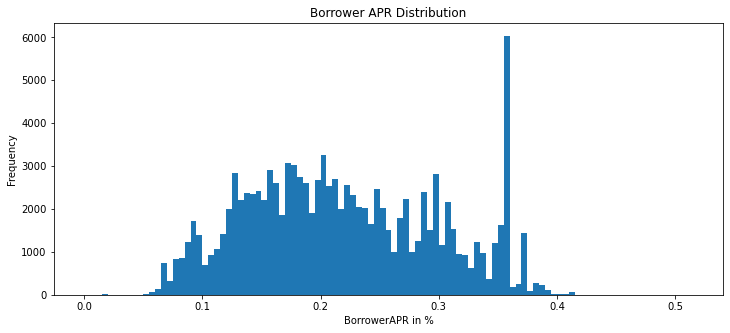

In [9]:
bins = np.arange(0, df['BorrowerAPR'].max()+0.005, 0.005)

plt.figure(figsize=[12,5])
plt.hist(data=df, x='BorrowerAPR', bins=bins);
plt.title('Borrower APR Distribution')
plt.xlabel('BorrowerAPR in %')
plt.ylabel('Frequency')

#### Borrower Interest rate distribution
The distribution shows a peak at 0.15 and a highest peak at 0.31 The entire distribution is concentrated between 0.05 and 0.35

Text(0, 0.5, 'Frequency')

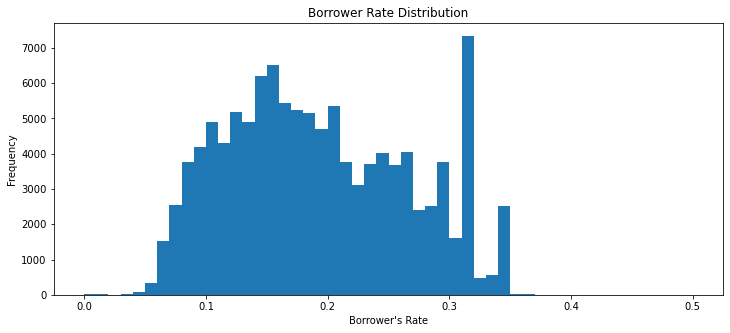

In [11]:
bins = np.arange(0, df['BorrowerRate'].max()+0.01, 0.01)

plt.figure(figsize=[12,5])
plt.hist(data=df, x='BorrowerRate', bins=bins);
plt.title('Borrower Rate Distribution')
plt.xlabel("Borrower's Rate")
plt.ylabel('Frequency')

#### ProsperRating
Prosper Rating is expressed as a letter grade that indicates the expected level of risk associated with a loan listing. The rating ranges from (Highest level of risk)HR----AA(least level of risk). The above plot shows that most loan takers has ratings of B and C.

Text(0.5, 1.0, 'Prosper distribution')

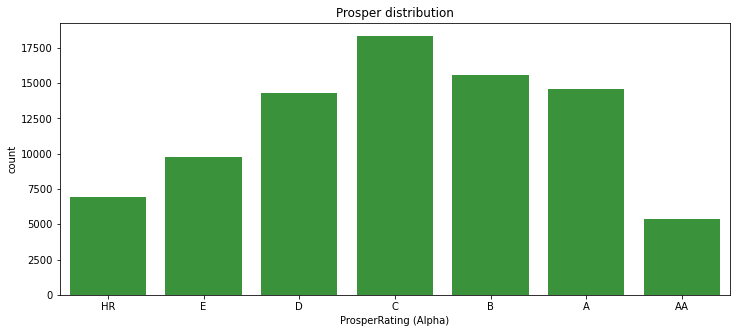

In [15]:
plt.figure(figsize=[12,5])
color = sns.color_palette()[2]
sns.countplot(data=df, x='ProsperRating (Alpha)', color=color);
plt.title('Prosper distribution')

#### Correlation Heat Map
There's is a strongly negative correlation between prosperScore and [BorrowerAPR & BorrowerRate] This indicate that increase in one will lead to decrease in the other. i.e if Borrower's Prosperscore is high, APR[Annual % rate and Interest rate] will be low

Negative correlation between the creditScore and [BorrowerAPR & BorrowerRate]. This means the better the creditscore, the lower the APR and the lesser the borrower will pay overtime. This can be use to determine how reliable a borrower will be in paying the loan

There's a positive correlation between the original Loan Amount and prosperscore

Loan Original Amount has a weak correlation with BorrowerAPR and BorrowerRate

Text(0.5, 1.0, "Borrower's APR/Rate correlation")

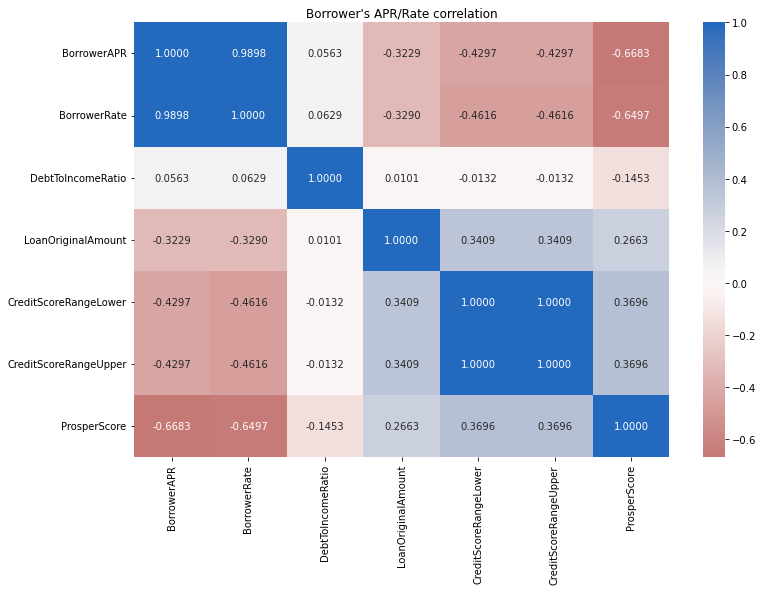

In [28]:
correlation_df = df[['BorrowerAPR', 'BorrowerRate', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'CreditScoreRangeLower', 
                     'CreditScoreRangeUpper','ProsperScore', 'ProsperRating (Alpha)','LoanStatus','ListingCategory (numeric)']]

# correlation plot 
plt.figure(figsize = [12, 8])
sns.heatmap(correlation_df.corr(), annot = True, fmt = '.4f',
           cmap = 'vlag_r', center = 0)
plt.title("Borrower's APR/Rate correlation")

#### LoanAmount VS BorrowerAPR
The higher the original borrowed amount, the lesser the BorrowerAPR

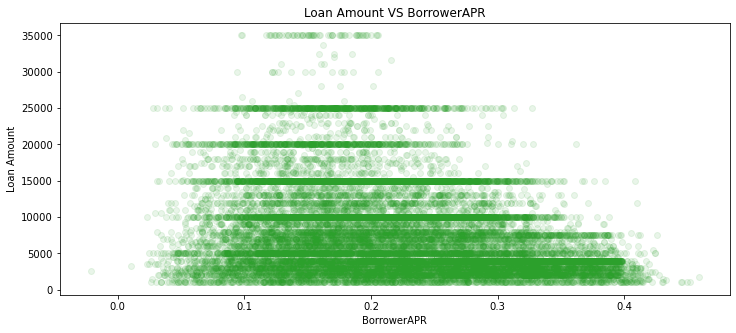

In [33]:
# randomly selecting 2000 samples
np.random.seed(2018)
sample=np.random.choice(df.shape[0], 20000, replace=False)
df_sub=df.loc[sample]

plt.figure(figsize=[12,5])

sns.regplot(data=df_sub, x='BorrowerAPR', y='LoanOriginalAmount', x_jitter=0.04, 
            scatter_kws={'alpha':1/10}, fit_reg=False, color=color)
plt.title('Loan Amount VS BorrowerAPR')
plt.xlabel('BorrowerAPR')
plt.ylabel('Loan Amount');

#### Listing Category VS BorrowerAPR & Rate

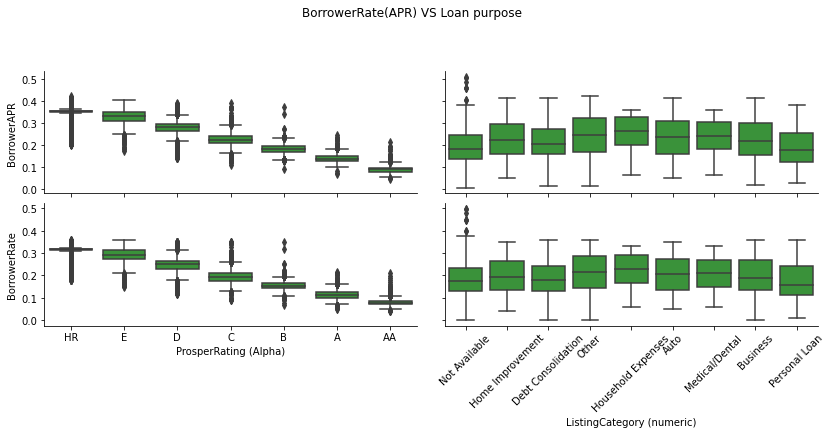

In [36]:
# Ploting numeric features against categorical features


def boxgrid(x,y,**kwargs):
    """ Quick hack for creating plot with seaborn's pairGrid"""
    color = sns.color_palette()[2]
    sns.boxplot(x=x, y=y, color=color)
    
    
g = sns.PairGrid(data=df_sub_cat, y_vars = ['BorrowerAPR', 'BorrowerRate'], x_vars = ['ProsperRating (Alpha)','ListingCategory (numeric)'], height=3, aspect=1.5);
g.map(boxgrid)
g.fig.set_size_inches(12, 5)
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('BorrowerRate(APR) VS Loan purpose')
plt.xticks(rotation=45);
plt.show()

#### Employment Listing APR
Borrower's that are employed but do not provide the purpose of loan, tends to have the highest average APR

Text(0.5, 1.0, 'Employment Listing APR')

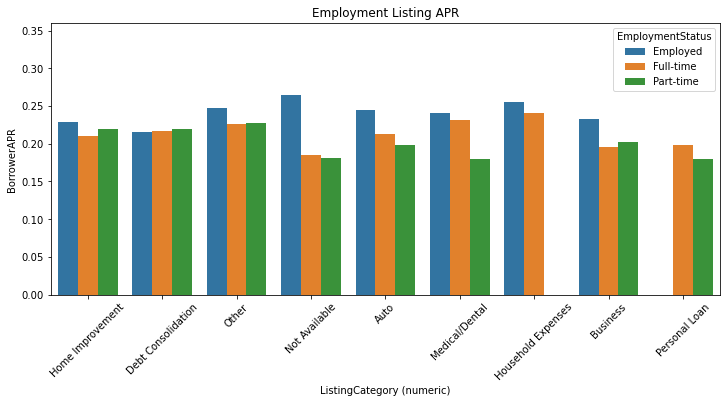

In [37]:
# Employment listing APR
plt.figure(figsize=[12,5])
df_employment_type = df_sub_cat.loc[df_sub_cat['EmploymentStatus'].isin(['Full-time','Employed','Part-time'])]
sns.barplot(data=df_employment_type, x='ListingCategory (numeric)', y='BorrowerAPR', 
            hue='EmploymentStatus', ci='sd', errwidth=0);
plt.xticks(rotation=45);
plt.title('Employment Listing APR')

#### Relationship between Loan Amount, purpose and employment status
From the plot, it can be deduce that employement status and the purpose of loan clearly influence the amount of loan been given.e.g Borrowers with part time job, but with very crucial loan purpose like medical/dental tends to be granted higher loan amount.

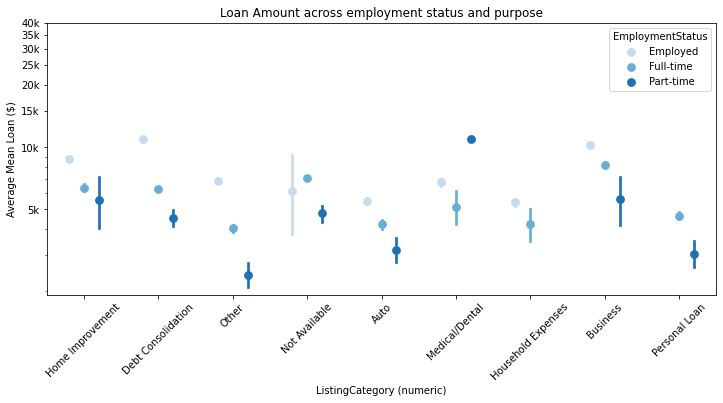

In [38]:
# Average originalloanAmount by loan purpose and employment status
fig = plt.figure(figsize = [12,5])
ax = sns.pointplot(data = df_employment_type, x = 'ListingCategory (numeric)', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Amount across employment status and purpose')
plt.ylabel('Average Mean Loan ($)')
plt.yscale('log')
plt.yticks([5e3, 10e3, 15e3, 20e3, 25e3, 30e3, 35e3, 40e3], ['5k','10k','15k','20k','25k','30k','35k','40k'])
ax.set_yticklabels([],minor = True)
plt.xticks(rotation=45)
plt.show();

#### Prosper Rating Effect on APR and Loan Amount
Better ratings increase the loan amount. The APR of the borrower decreases as the rating improves. When the Prosper ratings are increased from HR to A or better, the relationship between borrower APR and loan amount changes from negative to slightly positive. Since people with A or AA credit ratings tend to borrow more money, increasing the APR could prevent them from borrowing even more and maximize profits. However, people with lower ratings tend to borrow less money, so reducing APR could encourage them to borrow more.

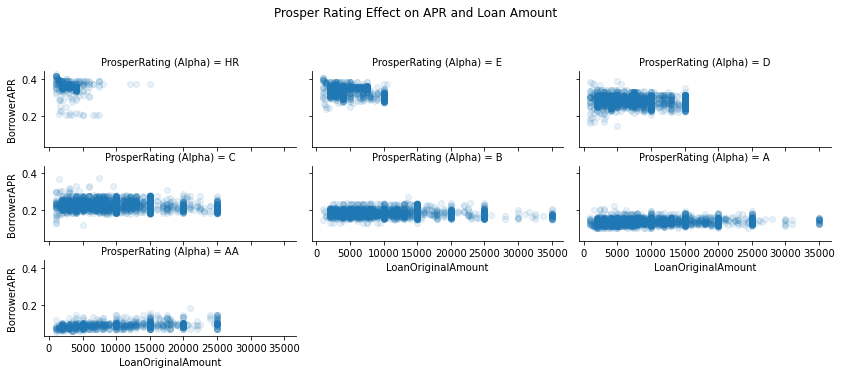

In [39]:
# Prosper rating effect on relationship of APR and loan amount
g=sns.FacetGrid(data=df_sub, aspect=1.2, height=3, col='ProsperRating (Alpha)', col_wrap=3)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.1, scatter_kws={'alpha':0.1}, fit_reg=False);
g.add_legend();
g.fig.set_size_inches(12, 5)
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Prosper Rating Effect on APR and Loan Amount');